In [5]:
#import libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

#open Dataset folder and import all .png file 
import os
path = 'Dataset'
files = os.listdir(path)
files.sort()
print(files)    



['1.png', '2.png', '3.png', '4.png']


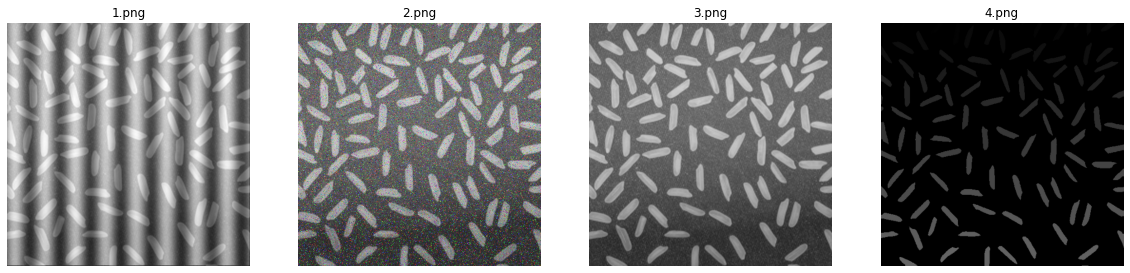

In [9]:
#view image
fig = plt.figure(figsize=(20,20))
for i in range(4):
    img = cv2.imread(os.path.join(path,files[i]))
    fig.add_subplot(1,4,i+1)
    plt.imshow(img)
    plt.title(files[i])
    plt.axis('off')